In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import skew


styles = [
    "open-street-map",
    "white-bg",
    "carto-position",
    "carto-darkmatter",
    "stamen-terrain",
    "stamen-toner",
]

pd.options.display.max_columns = 9999


In [2]:
df = pd.read_csv("../data/raw/Homes_raw.csv", sep=",").iloc[:, 1:]
df["SellPrice"] = df["SellPrice"].apply(
    lambda x: x.split(",")[1]
    .replace("€", "")
    .replace(".", "")
    .split(":")[1]
    .strip()
    .replace("'", "")
)

to_drop = df[df["SellPrice"] == "Sob Consulta"]
df.drop(to_drop.index, axis=0, inplace=True)
df["SellPrice"] = df["SellPrice"].astype("float64")


df["BusinessStatus"] = df["BusinessStatus"].apply(
    lambda x: x.split(":")[2].replace("'", "").replace("}", "").strip()
    if type(x) == str
    else x
)

df["ListingArea"] = (
    df["ListingArea"]
    .apply(lambda x: x.split("-")[1] if "-" in str(x) else x)
    .astype("float64")
)

df["NetArea"] = (
    df["NetArea"]
    .apply(lambda x: x.split("-")[1] if "-" in str(x) else x)
    .astype("float64")
)

df["Rooms"] = (
    df["Rooms"]
    .apply(lambda x: x.split("-")[1] if "-" in str(x) else x)
    .astype("float64")
)

df["Rooms"] = df["Rooms"].apply(lambda x: 1 if x == 0 else x)

df["RealEstate"] = df["RealEstate"].apply(
    lambda x: str(x).split("'")[11].split("ERA ")[1] if ":" in str(x) else x
)


df["Lng"] = (
    df["Lng"]
    .apply(lambda x: x.replace(",", ".") if "," in str(x) else x)
    .astype("float64")
)

df["Lat"] = (
    df["Lat"]
    .apply(lambda x: x.replace(",", ".") if "," in str(x) else x)
    .astype("float64")
)

df["City"] = df["Localization"].apply(lambda x: x.split(",")[-1].strip())


C:\Users\paro\AppData\Local\Temp\ipykernel_12320\2857588326.py:1: DtypeWarning: Columns (8,19,21,24,26,31,32,36,38,39,40,41,42,45,46,47,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/Homes_raw.csv", sep=",").iloc[:, 1:]


In [3]:
df.head()


,DetailUrl,Gallery,BelongsToDevelopment,BusinessStatus,BusinessType,Ce,Elevator,Floor,HasExactLocation,HasVirtualTour,Highlights,Id,IsDevelopment,IsExcluded,IsFavorite,IsFreeAdProperty,IsOnline,IsSold,LandArea,Lat,ListingArea,Lng,Localization,NetArea,Owner,Parking,PropertyAdState,PropertyType,RealEstate,Reference,RentPrice,Rooms,SellPrice,SubleasePrice,Title,Wcs,LastContactInfo,FractionNumb,FloorNumb,HousingArea,ListingBuildingArea,ImplantationArea,ConstructionFeasibility,Walled,PriceNetArea,PriceListingArea,PriceLandArea,RentPriceNetArea,RentPriceListingArea,RentPriceLandArea,SubLeasePriceNetArea,SubLeasePriceListingArea,SubLeasePriceLandArea,City
0,https://www.era.pt/imovel/moradia-t4-vila-nova...,[{'Url': 'https://mediaredir2.era.pt/i/moradia...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",NaN,False,NaN,False,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1348241,False,False,False,False,True,False,735,40.890590,430.0,-8.535915,"Sandim, Olival, Lever e Crestuma, Porto",280.0,NaN,6,NaN,Moradia,Gaia Douro,174230292.0,NaN,4.0,450000.0,NaN,"Moradia T4 / Vila Nova de Gaia, Sandim, Olival...",4,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Porto
1,https://www.era.pt/imovel/apartamento-t3-amado...,[{'Url': 'https://mediaredir2.era.pt/i/apartam...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",E,False,0,False,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1348155,False,False,False,False,True,False,NaN,38.759090,90.0,-9.229261,"Falagueira, Amadora",80.0,NaN,0,NaN,Apartamento,Amadora Nascente,330230166.0,NaN,3.0,235000.0,NaN,"Apartamento T3 / Amadora, Falagueira",2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amadora
2,https://www.era.pt/imovel/moradia-isolada-t3-t...,[{'Url': 'https://mediaredir2.era.pt/i/moradia...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",B,False,NaN,True,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1347600,False,False,False,False,True,False,76,39.465263,150.0,-8.567995,"Brogueira, Torres Novas",125.0,NaN,1,NaN,Moradia Isolada,Torres Novas / Entroncamento,294230188.0,NaN,3.0,280000.0,NaN,"Moradia Isolada T3 / Torres Novas, Brogueira",2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Torres Novas
3,https://www.era.pt/imovel/apartamento-t2-novo-...,[{'Url': 'https://mediaredir2.era.pt/i/apartam...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",D,False,1,True,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1347265,False,False,False,False,True,False,NaN,38.721205,96.0,-9.408745,"Alcabideche, Lisboa",96.0,NaN,NaN,NaN,Apartamento,Estoril,347230086.0,NaN,2.0,540000.0,NaN,"Apartamento T2 / Cascais, Alcabideche",2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lisboa
4,https://www.era.pt/imovel/moradia-t3-ilhavo-il...,[{'Url': 'https://mediaredir2.era.pt/i/moradia...,False,Disponível,"[{'ResultPage': None, 'Id': 1, 'Name': 'Compra...",F,False,NaN,True,False,"{'ExtraInfo': '', 'GroupId': 2, 'Id': 5, 'Name...",1348209,False,False,False,False,True,False,NaN,40.593400,NaN,-8.674569,"Ílhavo (São Salvador), Aveiro",94.0,NaN,0,NaN,Moradia,Aveiro,124230173.0,NaN,3.0,169900.0,NaN,"Moradia T3 / Ílhavo, Ílhavo (São Salvador)",5,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aveiro


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DetailUrl                 15194 non-null  object 
 1   Gallery                   15194 non-null  object 
 2   BelongsToDevelopment      15194 non-null  bool   
 3   BusinessStatus            14915 non-null  object 
 4   BusinessType              15194 non-null  object 
 5   Ce                        10987 non-null  object 
 6   Elevator                  15194 non-null  bool   
 7   Floor                     6494 non-null   object 
 8   HasExactLocation          15194 non-null  bool   
 9   HasVirtualTour            15194 non-null  bool   
 10  Highlights                10530 non-null  object 
 11  Id                        15194 non-null  int64  
 12  IsDevelopment             15194 non-null  bool   
 13  IsExcluded                15194 non-null  bool   
 14  IsFavo

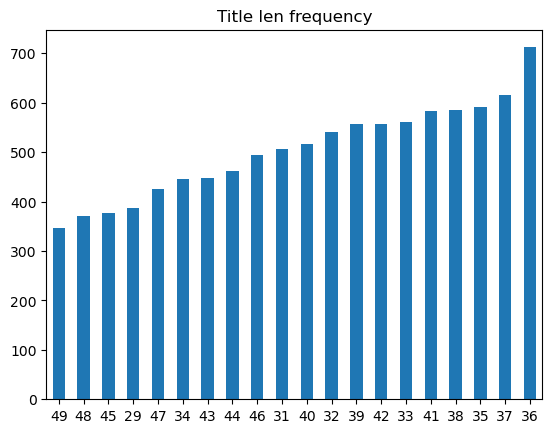

In [5]:
df["Title"].str.len().value_counts(ascending=True).tail(20).plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Title len frequency")
plt.show()

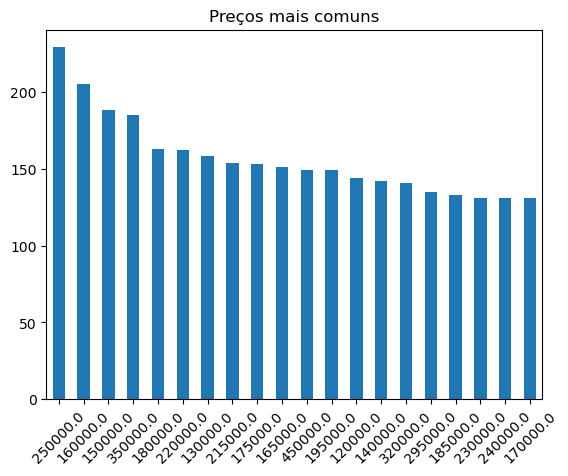

In [6]:
df["SellPrice"].value_counts().head(20).plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Preços mais comuns")
plt.show()


### Useful cols with more than 14k non null

In [7]:
feats = [
    "SellPrice",
    "NetArea",
    "City",
    "Lat",
    "Lng",
    "Localization",
    "Elevator",
    "HasExactLocation",
    "HasVirtualTour",
    "IsOnline",
    "IsSold",
    "ListingArea",
    "Walled",
    "ConstructionFeasibility",
    "Rooms",
    "PropertyType",
]

In [8]:
df.corr()["SellPrice"].sort_values(ascending=False)


C:\Users\paro\AppData\Local\Temp\ipykernel_12320\4081129765.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["SellPrice"].sort_values(ascending=False)


SellPrice                   1.000000
Rooms                       0.321579
NetArea                     0.138631
ListingArea                 0.130571
Elevator                    0.083765
HasVirtualTour              0.030197
IsDevelopment               0.027136
Id                          0.000459
Walled                     -0.000944
ConstructionFeasibility    -0.002012
IsOnline                   -0.027136
Lng                        -0.044595
Reference                  -0.090770
Lat                        -0.142352
HasExactLocation           -0.166113
BelongsToDevelopment             NaN
IsExcluded                       NaN
IsFavorite                       NaN
IsFreeAdProperty                 NaN
IsSold                           NaN
Owner                            NaN
PropertyAdState                  NaN
SubleasePrice                    NaN
LastContactInfo                  NaN
RentPriceLandArea                NaN
SubLeasePriceNetArea             NaN
SubLeasePriceListingArea         NaN
S

In [9]:
df[feats].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SellPrice                15194 non-null  float64
 1   NetArea                  14254 non-null  float64
 2   City                     15194 non-null  object 
 3   Lat                      14161 non-null  float64
 4   Lng                      14161 non-null  float64
 5   Localization             15194 non-null  object 
 6   Elevator                 15194 non-null  bool   
 7   HasExactLocation         15194 non-null  bool   
 8   HasVirtualTour           15194 non-null  bool   
 9   IsOnline                 15194 non-null  bool   
 10  IsSold                   15194 non-null  bool   
 11  ListingArea              14396 non-null  float64
 12  Walled                   15194 non-null  bool   
 13  ConstructionFeasibility  15194 non-null  bool   
 14  Rooms                 

In [10]:
houses = df[feats].copy(deep=True)
# preencher as lats e longs com as medianas de cada cidade
houses["Lng"] = houses["Lng"].fillna(
    houses.groupby(["City"])["Lng"].transform("median")
)

houses["Lat"] = houses["Lat"].fillna(
    houses.groupby(["City"])["Lat"].transform("median")
)

# algumas instâncias têm erros na lat e lng
# lat e lng extraidos da mediana de outras instâncias

houses.loc[(houses["City"] == "Lisboa") & (houses["Lat"] < 30), "Lat"] = houses.groupby(
    ["City"]
).median()["Lat"]["Lisboa"]

houses.loc[(houses["City"] == "Lisboa") & (houses["Lat"] < 30), "Lng"] = houses.groupby(
    ["City"]
).median()["Lng"]["Lisboa"]


C:\Users\paro\AppData\Local\Temp\ipykernel_12320\3555329433.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).median()["Lat"]["Lisboa"]
C:\Users\paro\AppData\Local\Temp\ipykernel_12320\3555329433.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).median()["Lng"]["Lisboa"]


In [11]:
# px.scatter_mapbox(houses, lat="Lat", lon="Lng",
#                   mapbox_style=styles[0], color="City")

In [12]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SellPrice                15194 non-null  float64
 1   NetArea                  14254 non-null  float64
 2   City                     15194 non-null  object 
 3   Lat                      15191 non-null  float64
 4   Lng                      15191 non-null  float64
 5   Localization             15194 non-null  object 
 6   Elevator                 15194 non-null  bool   
 7   HasExactLocation         15194 non-null  bool   
 8   HasVirtualTour           15194 non-null  bool   
 9   IsOnline                 15194 non-null  bool   
 10  IsSold                   15194 non-null  bool   
 11  ListingArea              14396 non-null  float64
 12  Walled                   15194 non-null  bool   
 13  ConstructionFeasibility  15194 non-null  bool   
 14  Rooms                 

Vamos fazer quick test mesmo com alguns outliers para ver a performance

## Tenho que processar:
- imputar
- testar a skew de cada row numérica
- aplicar log e talvez a seguir scaling


In [13]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

log_transformer = FunctionTransformer(np.log, np.exp, feature_names_out="one-to-one")

cat_imp = Pipeline(
    [
        ("cat_imp", SimpleImputer(strategy="most_frequent")),
    ]
)

num_imp_log = Pipeline(
    [
        ("num_imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ],  # ("log", log_transformer)]
)

objects = houses.select_dtypes(object).columns.values
numbers = houses.select_dtypes(np.number).columns.values

preprocess = ColumnTransformer(
    [
        ("cat_preprocess", cat_imp, objects),
        ("num_preprocess", num_imp_log, numbers),
    ]
)

# houses["Lng"] = houses["Lng"].abs()

houses_preprocessed = preprocess.fit_transform(houses)

In [14]:
feat_names = [
    preprocess.get_feature_names_out()[i].split("__")[-1]
    for i in range(len(preprocess.get_feature_names_out()))
]

houses_preprocessed = pd.DataFrame(houses_preprocessed, columns=feat_names)


Text(0.5, 1.0, 'Log(SellPrice)')

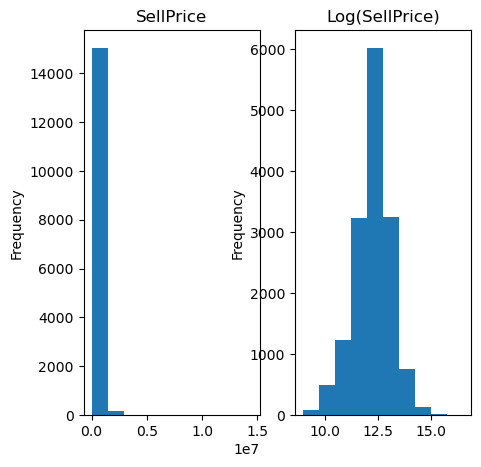

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(5, 5))

plt.sca(axes[0])
df["SellPrice"].plot.hist()
plt.title("SellPrice")

plt.sca(axes[1])
pd.Series(log_transformer.fit_transform(df["SellPrice"])).plot.hist()
plt.title("Log(SellPrice)")


## testar a skew de cada row numérica

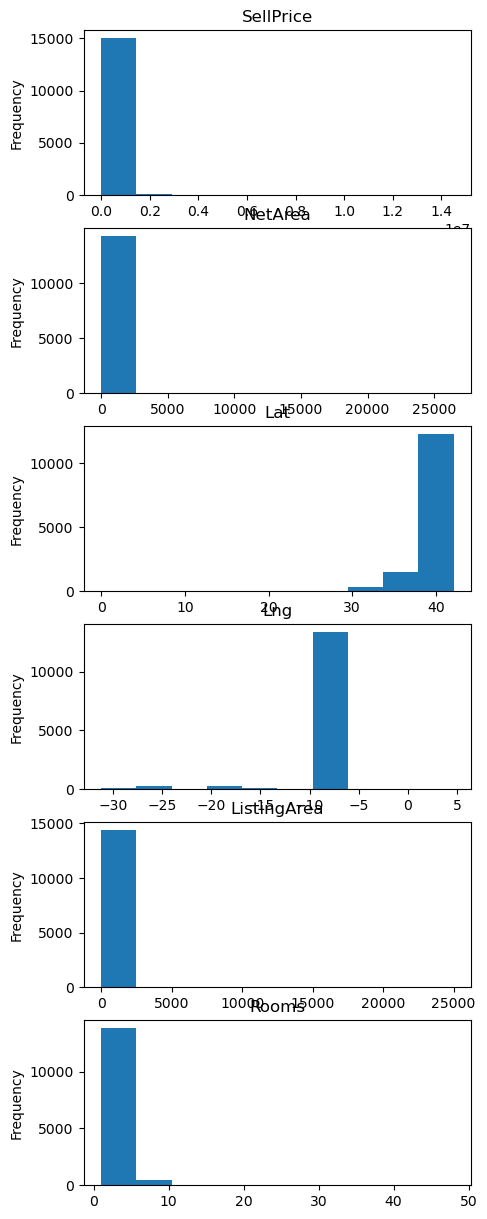

In [16]:
cols_num = houses.select_dtypes(np.number).columns

fig, axes = plt.subplots(len(cols_num), figsize=(5, 15))

for i, col in enumerate(cols_num):
    plt.sca(axes[i])
    df[col].plot.hist()
    plt.title(col)


Ou seja estão todas skewed, vamos logaritmizar

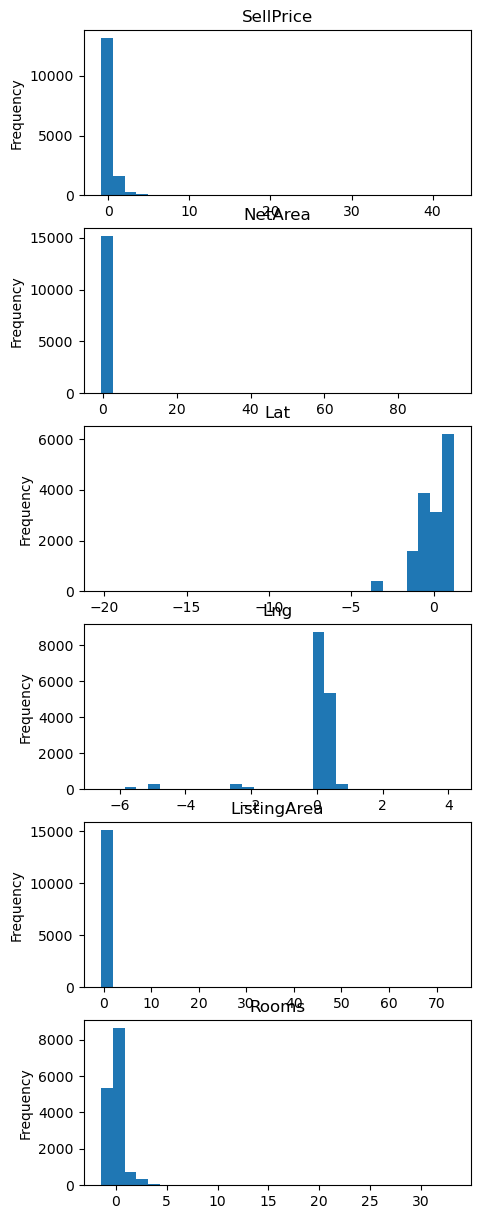

In [17]:
fig, axes = plt.subplots(len(cols_num), figsize=(5, 15))

for i, col in enumerate(cols_num):
    plt.sca(axes[i])
    houses_preprocessed[col].plot.hist(bins=30)
    plt.title(col)

In [18]:
houses.corr()["SellPrice"].sort_values(ascending=False)


C:\Users\paro\AppData\Local\Temp\ipykernel_12320\2526852702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  houses.corr()["SellPrice"].sort_values(ascending=False)


SellPrice                  1.000000
Rooms                      0.321579
NetArea                    0.138631
ListingArea                0.130571
Elevator                   0.083765
HasVirtualTour             0.030197
Walled                    -0.000944
ConstructionFeasibility   -0.002012
IsOnline                  -0.027136
Lng                       -0.042163
Lat                       -0.159297
HasExactLocation          -0.166113
IsSold                          NaN
Name: SellPrice, dtype: float64

In [19]:
houses["Rooms"].isna().sum()

887

In [20]:
for col in cols_num:
    houses_preprocessed[col] = houses_preprocessed[col].astype("float64")


In [21]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split

X = houses_preprocessed.iloc[:, 4:]
# X = X[["Lat", "ListingArea", "Rooms"]].values
y = houses_preprocessed.iloc[:, 3]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

lin_reg = LinearRegression()

rmses_lin_reg = -cross_val_score(
    lin_reg, X, y, cv=5, scoring="neg_root_mean_squared_error"
)


In [22]:
rmses_lin_reg.mean()

0.9335651151316595

In [23]:
from sklearn.metrics import mean_squared_error

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

1.0384877609056227

In [24]:
houses_preprocessed[["Lat", "Lng"]].isna().sum()

Lat    0
Lng    0
dtype: int64

# Análise do erro:

Text(0.5, 1.0, 'Training set vs predict on training set')

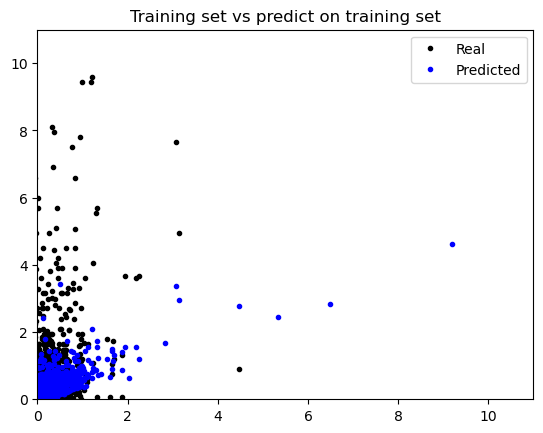

In [25]:
plt.plot(X_train["ListingArea"], y_train, "k.", label="Real")
plt.plot(X_train["ListingArea"], lin_reg.predict(
    X_train), "b.", label="Predicted")
plt.axis([0, 11, 0, 11])
plt.legend(loc="upper right")
plt.title("Training set vs predict on training set")


Text(0.5, 1.0, 'Test set vs predict on Test set')

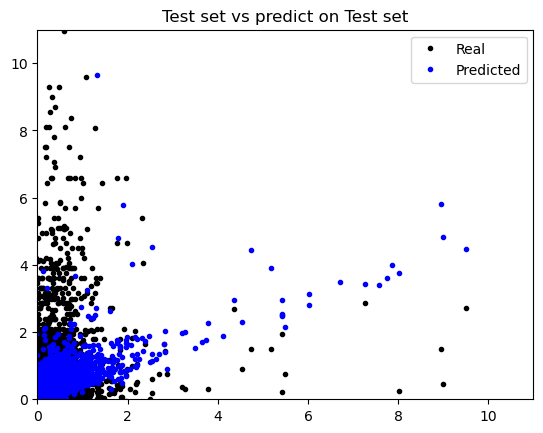

In [26]:
plt.plot(X_test["ListingArea"], y_test, "k.", label="Real")
plt.plot(X_test["ListingArea"], lin_reg.predict(
    X_test), "b.", label="Predicted")
plt.axis([0, 11, 0, 11])
plt.legend(loc="upper right")
plt.title("Test set vs predict on Test set")


(0.0, 11.0, -10.0, 10.0)

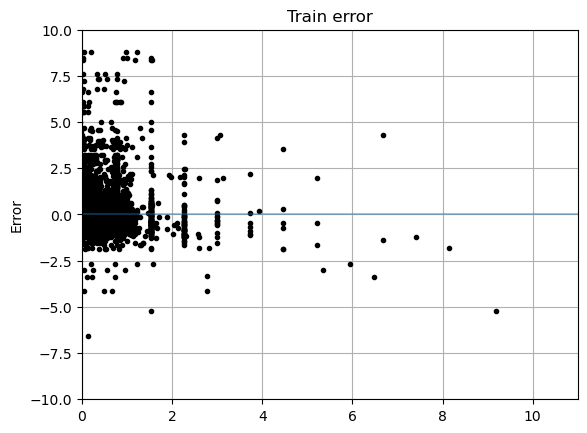

In [27]:
y_train_pred = lin_reg.predict(X_train)
train_error = y_train - y_train_pred

plt.plot(X_train, train_error, "k.")
plt.axhline(y=0, alpha=0.4)
plt.grid()
plt.title("Train error")
plt.ylabel("Error")
plt.axis([0, 11, -10, 10])


(0.0, 11.0, -10.0, 10.0)

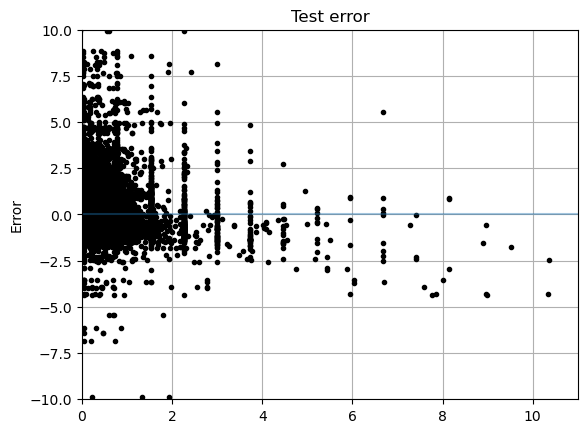

In [28]:
y_test_pred = lin_reg.predict(X_test)
test_error = y_test - y_test_pred

plt.plot(X_test, test_error, "k.")
plt.axhline(y=0, alpha=0.4)
plt.grid()
plt.title("Test error")
plt.ylabel("Error")
plt.axis([0, 11, -10, 10])


Não percebo o porquê de termos uma sobreposição vertical de tantos pontos, aka tantos X_train e X_test iguais. 
Talvez se adicionar as categóricas haja um melhor fit do modelo.

In [29]:
pd.DataFrame(
    {"Train error": train_error.round(2), "Test error": test_error.round(2)}
).describe()

,Train error,Test error
count,3038.000000,12156.000000
mean,0.000053,-0.037901
std,0.895550,1.037875
min,-6.600000,-35.670000
25%,-0.420000,-0.420000
50%,-0.130000,-0.140000
75%,0.190000,0.180000
max,11.580000,40.150000


O erro de treino em média é mt menor aka overfit !!!
- Tenho que dar log transform nas variáveis mais skewed

In [30]:
houses.isna().sum()


SellPrice                    0
NetArea                    940
City                         0
Lat                          3
Lng                          3
Localization                 0
Elevator                     0
HasExactLocation             0
HasVirtualTour               0
IsOnline                     0
IsSold                       0
ListingArea                798
Walled                       0
ConstructionFeasibility      0
Rooms                      887
PropertyType                 0
dtype: int64

In [31]:
houses.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SellPrice                15194 non-null  float64
 1   NetArea                  14254 non-null  float64
 2   City                     15194 non-null  object 
 3   Lat                      15191 non-null  float64
 4   Lng                      15191 non-null  float64
 5   Localization             15194 non-null  object 
 6   Elevator                 15194 non-null  bool   
 7   HasExactLocation         15194 non-null  bool   
 8   HasVirtualTour           15194 non-null  bool   
 9   IsOnline                 15194 non-null  bool   
 10  IsSold                   15194 non-null  bool   
 11  ListingArea              14396 non-null  float64
 12  Walled                   15194 non-null  bool   
 13  ConstructionFeasibility  15194 non-null  bool   
 14  Rooms                 

### Imputar

In [32]:
# tornar bools 1 (True) ou 0 (False)
bools = houses.select_dtypes(bool).columns.values

for bool in bools:
    houses[bool] = houses[bool].apply(lambda x: x * 1).astype("int64")

houses.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15194 entries, 0 to 16761
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SellPrice                15194 non-null  float64
 1   NetArea                  14254 non-null  float64
 2   City                     15194 non-null  object 
 3   Lat                      15191 non-null  float64
 4   Lng                      15191 non-null  float64
 5   Localization             15194 non-null  object 
 6   Elevator                 15194 non-null  int64  
 7   HasExactLocation         15194 non-null  int64  
 8   HasVirtualTour           15194 non-null  int64  
 9   IsOnline                 15194 non-null  int64  
 10  IsSold                   15194 non-null  int64  
 11  ListingArea              14396 non-null  float64
 12  Walled                   15194 non-null  int64  
 13  ConstructionFeasibility  15194 non-null  int64  
 14  Rooms                 

In [33]:
cat_imp = Pipeline([("cat_imp", SimpleImputer(strategy="most_frequent"))])
num_imp = Pipeline([("num_imp", SimpleImputer(strategy="median"))])

numbers = houses.select_dtypes(np.number).columns.values

impute_pipe = ColumnTransformer(
    [("cat_process", cat_imp, objects), ("num_process", num_imp, numbers)]
)

houses_imputed = impute_pipe.fit_transform(houses)

In [34]:
feat_names = [
    impute_pipe.get_feature_names_out()[i].split("__")[-1]
    for i in range(len(impute_pipe.get_feature_names_out()))
]

houses_imputed = pd.DataFrame(houses_imputed, columns=feat_names)
houses_imputed = houses_imputed.astype(houses.dtypes.to_dict())
houses_imputed.head()

,City,Localization,PropertyType,SellPrice,NetArea,Lat,Lng,Elevator,HasExactLocation,HasVirtualTour,IsOnline,IsSold,ListingArea,Walled,ConstructionFeasibility,Rooms
0,Porto,"Sandim, Olival, Lever e Crestuma, Porto",Moradia,450000.0,280.0,40.890590,-8.535915,0,0,0,1,0,430.0,0,0,4.0
1,Amadora,"Falagueira, Amadora",Apartamento,235000.0,80.0,38.759090,-9.229261,0,0,0,1,0,90.0,0,0,3.0
2,Torres Novas,"Brogueira, Torres Novas",Moradia Isolada,280000.0,125.0,39.465263,-8.567995,0,1,0,1,0,150.0,0,0,3.0
3,Lisboa,"Alcabideche, Lisboa",Apartamento,540000.0,96.0,38.721205,-9.408745,0,1,0,1,0,96.0,0,0,2.0
4,Aveiro,"Ílhavo (São Salvador), Aveiro",Moradia,169900.0,94.0,40.593400,-8.674569,0,1,0,1,0,126.0,0,0,3.0


In [35]:
to_log = ["SellPrice", "NetArea", "ListingArea"]

for col in to_log:
    houses_imputed[col] = log_transformer.fit_transform(houses_imputed[col])

houses_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15194 entries, 0 to 15193
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City                     15194 non-null  object 
 1   Localization             15194 non-null  object 
 2   PropertyType             15194 non-null  object 
 3   SellPrice                15194 non-null  float64
 4   NetArea                  15194 non-null  float64
 5   Lat                      15194 non-null  float64
 6   Lng                      15194 non-null  float64
 7   Elevator                 15194 non-null  int64  
 8   HasExactLocation         15194 non-null  int64  
 9   HasVirtualTour           15194 non-null  int64  
 10  IsOnline                 15194 non-null  int64  
 11  IsSold                   15194 non-null  int64  
 12  ListingArea              15194 non-null  float64
 13  Walled                   15194 non-null  int64  
 14  ConstructionFeasibilit

In [36]:
def plot_logged(col):
    plt.subplot(121)
    df[col].plot.hist()
    plt.title(col)

    plt.subplot(122)
    houses_imputed[col].plot.hist()
    plt.title(f"Log({col})")

    return plt.show()


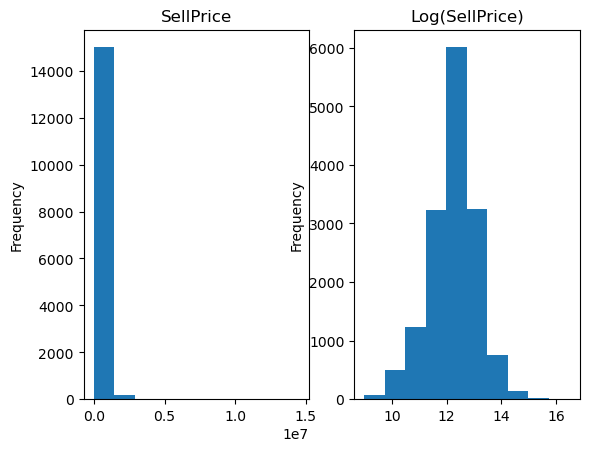

In [37]:
plot_logged("SellPrice")

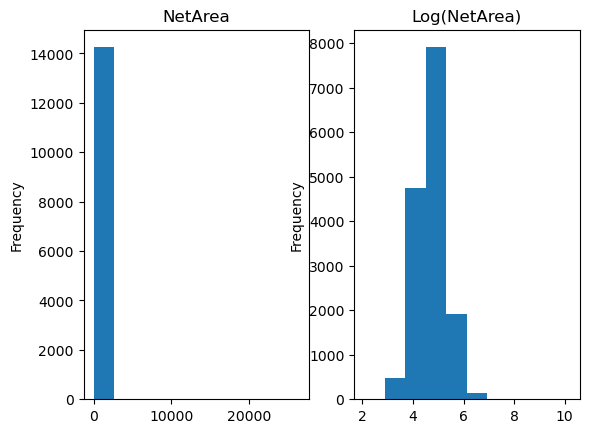

In [38]:
plot_logged("NetArea")

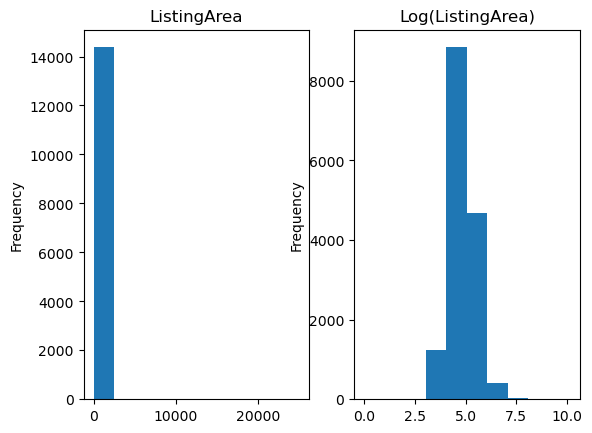

In [39]:
plot_logged("ListingArea")

### Vamos utilizar só os números primeiro.

In [40]:
houses_imputed.select_dtypes(np.number)

,SellPrice,NetArea,Lat,Lng,Elevator,HasExactLocation,HasVirtualTour,IsOnline,IsSold,ListingArea,Walled,ConstructionFeasibility,Rooms
0,13.017003,5.634790,40.890590,-8.535915,0,0,0,1,0,6.063785,0,0,4.0
1,12.367341,4.382027,38.759090,-9.229261,0,0,0,1,0,4.499810,0,0,3.0
2,12.542545,4.828314,39.465263,-8.567995,0,1,0,1,0,5.010635,0,0,3.0
3,13.199324,4.564348,38.721205,-9.408745,0,1,0,1,0,4.564348,0,0,2.0
4,12.042965,4.543295,40.593400,-8.674569,0,1,0,1,0,4.836282,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15189,10.778956,4.276666,39.823480,-7.494804,0,0,0,1,0,4.317488,0,0,1.0
15190,10.887437,3.433987,39.326123,-9.232749,0,0,0,1,0,4.094345,0,0,2.0
15191,12.899220,4.691348,37.759100,-25.650500,0,1,0,1,0,5.627621,0,0,3.0
15192,11.289782,4.691348,41.348130,-8.400326,0,0,0,1,0,5.752573,0,0,3.0


In [41]:
X = houses_imputed.select_dtypes(np.number).iloc[:, 1:]
y = houses_imputed.select_dtypes(np.number).iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

rmses_lin_reg = -cross_val_score(
    lin_reg, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error"
)

rmses_lin_reg.mean()

0.6794251141571203

## RMSE menor com variáveis unskewed

In [42]:
y_pred = lin_reg.predict(X_test)
mean_squared_error(y_test, y_pred, squared=False)

0.6835687315707422

## Análise do erro com algumas variáveis logaritmizadas

Text(0.5, 1.0, 'Training set vs predict on Training set')

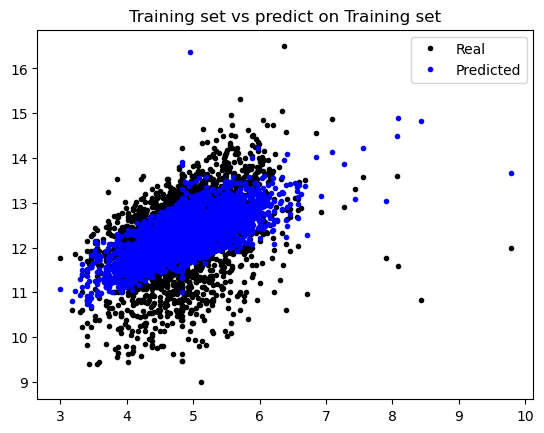

In [43]:
plt.plot(X_train["ListingArea"], y_train, "k.", label="Real")
plt.plot(X_train["ListingArea"], lin_reg.predict(
    X_train), "b.", label="Predicted")
plt.axis()
plt.legend(loc="upper right")
plt.title("Training set vs predict on Training set")


Text(0.5, 1.0, 'Test set vs predict on Test set')

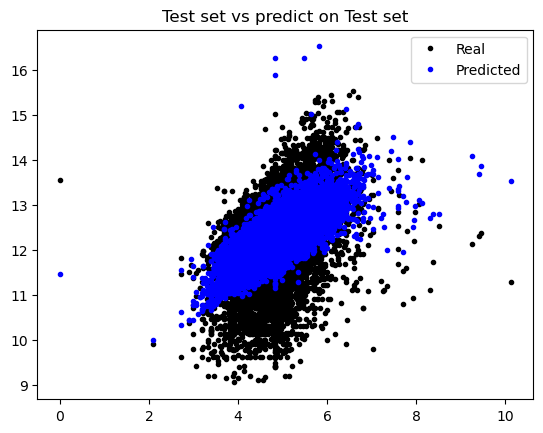

In [44]:
plt.plot(X_test["ListingArea"], y_test, "k.", label="Real")
plt.plot(X_test["ListingArea"], lin_reg.predict(
    X_test), "b.", label="Predicted")
plt.axis()
plt.legend(loc="upper right")
plt.title("Test set vs predict on Test set")


Text(0, 0.5, 'Error')

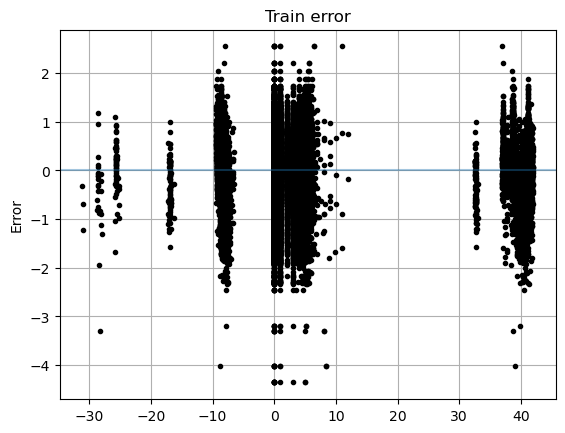

In [45]:
y_train_pred = lin_reg.predict(X_train)
train_error = y_train - y_train_pred

plt.plot(X_train, train_error, "k.")
plt.axhline(y=0, alpha=0.4)
plt.grid()
plt.title("Train error")
plt.ylabel("Error")
# plt.axis([0, 11, -10, 10])


Text(0, 0.5, 'Error')

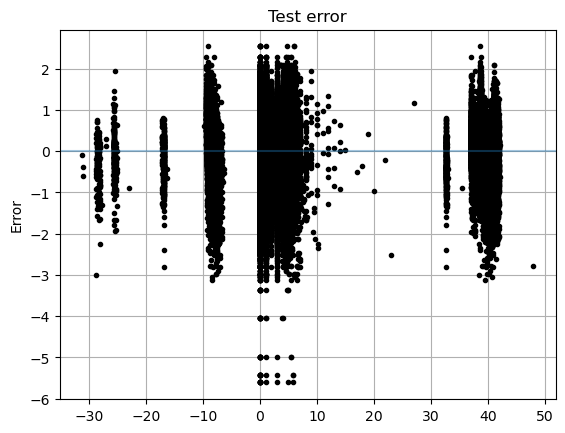

In [46]:
y_test_pred = lin_reg.predict(X_test)
test_error = y_test - y_test_pred

plt.plot(X_test, test_error, "k.")
plt.axhline(y=0, alpha=0.4)
plt.grid()
plt.title("Test error")
plt.ylabel("Error")
# plt.axis([0, 11, -10, 10])
